In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg

In [128]:
df1 = pd.read_excel('D:/Project/Global Superstore 2018.xlsx',parse_dates=['Order Date'],index_col=0)
df = df1[['Order Date','Sales']]
df.set_index(['Order Date'],inplace=True)
df.head(2)

,Sales
Order Date,
2017-03-22,731.82
2015-09-01,243.54


<h2>Holt Winter's Model<h2>

In [129]:
d3 = df.groupby('Order Date')['Sales'].sum()
d3 = pd.DataFrame(d3)
d3.head(10)

,Sales
Order Date,
2014-01-01,808.56300
2014-01-02,314.22000
2014-01-03,4503.53720
2014-01-04,2808.87024
2014-01-05,3662.31000
2014-01-06,622.53810
2014-01-07,7123.01850
2014-01-08,6293.26000
2014-01-09,813.74940


In [130]:
#Resample to convert daily data to monthly data.
d3 = d3.resample(rule='MS').sum()
d3.head(15)

,Sales
Order Date,
2014-01-01,98898.48886
2014-02-01,103717.92328
2014-03-01,135746.40206
2014-04-01,114332.96318
2014-05-01,158228.32880
2014-06-01,207571.54352
2014-07-01,118434.88462
2014-08-01,208063.28372
2014-09-01,284587.74846


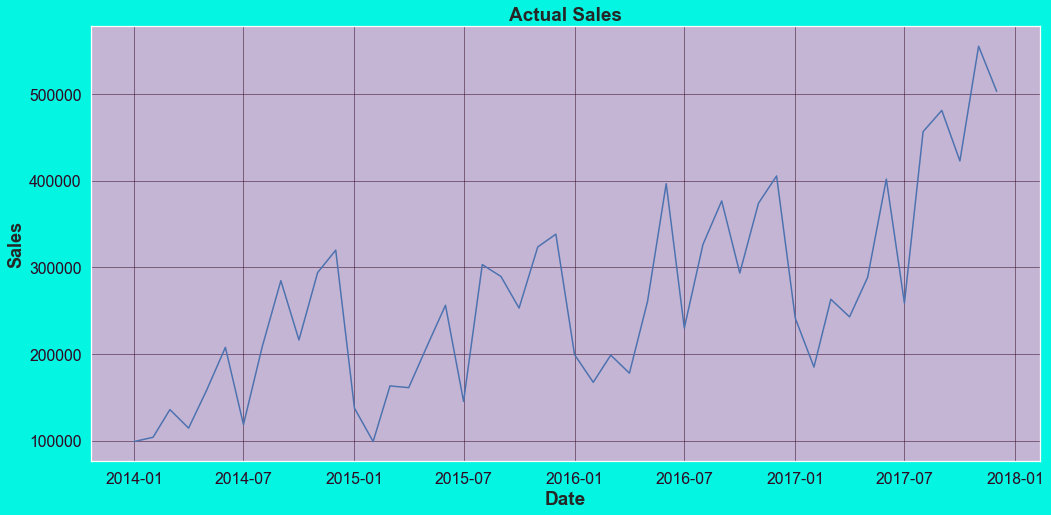

In [131]:
sns.lineplot(data=d3,x='Order Date',y='Sales',ci=None)
plt.gcf().set_size_inches(17,8)
sns.set(rc={'axes.facecolor':'#c5b5d4','figure.facecolor':'#04f5e1'})
plt.xlabel('Date',fontsize=19,fontweight='bold')
plt.ylabel('Sales',fontsize=18,fontweight='bold')
plt.title('Actual Sales',fontsize=19,fontweight='bold')
plt.tick_params(axis='both', labelsize=15.8,length=6, width=2, colors='#300923',grid_color='#300923', grid_alpha=0.5)

In [132]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

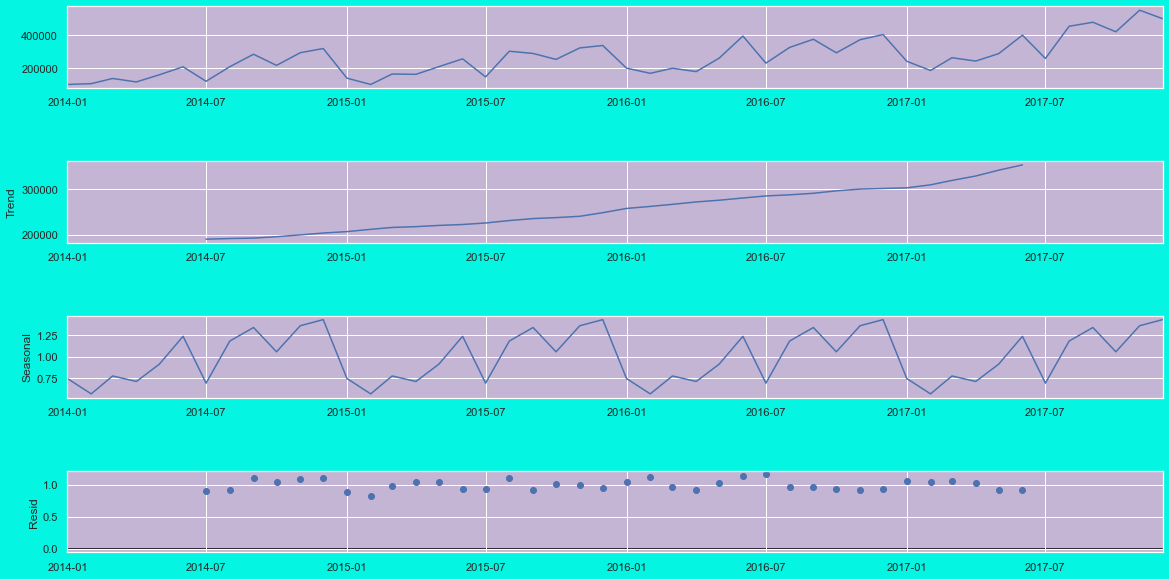

In [133]:
s1 = seasonal_decompose(d3,model='multiplicative')
s1.plot()
sns.set(rc={'axes.facecolor':'#c5b5d4','figure.facecolor':'#04f5e1'})
plt.gcf().set_size_inches(19,9)

In [134]:
d_train = d3[:36]
print(d_train.tail())
d_test = d3[36:]
print(d_test.head())

                   Sales
Order Date              
2016-08-01  326488.78936
2016-09-01  376619.24568
2016-10-01  293406.64288
2016-11-01  373989.36010
2016-12-01  405454.37802
                   Sales
Order Date              
2017-01-01  241268.55566
2017-02-01  184837.35556
2017-03-01  263100.77262
2017-04-01  242771.86130
2017-05-01  288401.04614


In [135]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel = ExponentialSmoothing(d_train.Sales,trend='mul',seasonal='mul',seasonal_periods=12).fit()#

C:\Users\win\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [136]:
test_pred = hwmodel.forecast(12)
test_pred

2017-01-01    218515.717061
2017-02-01    170498.130741
2017-03-01    235096.706354
2017-04-01    221870.284386
2017-05-01    305553.823298
2017-06-01    421074.828906
2017-07-01    211443.095870
2017-08-01    406593.068466
2017-09-01    466355.778722
2017-10-01    379497.882508
2017-11-01    500621.701597
2017-12-01    528877.133541
Freq: MS, dtype: float64

In [137]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib

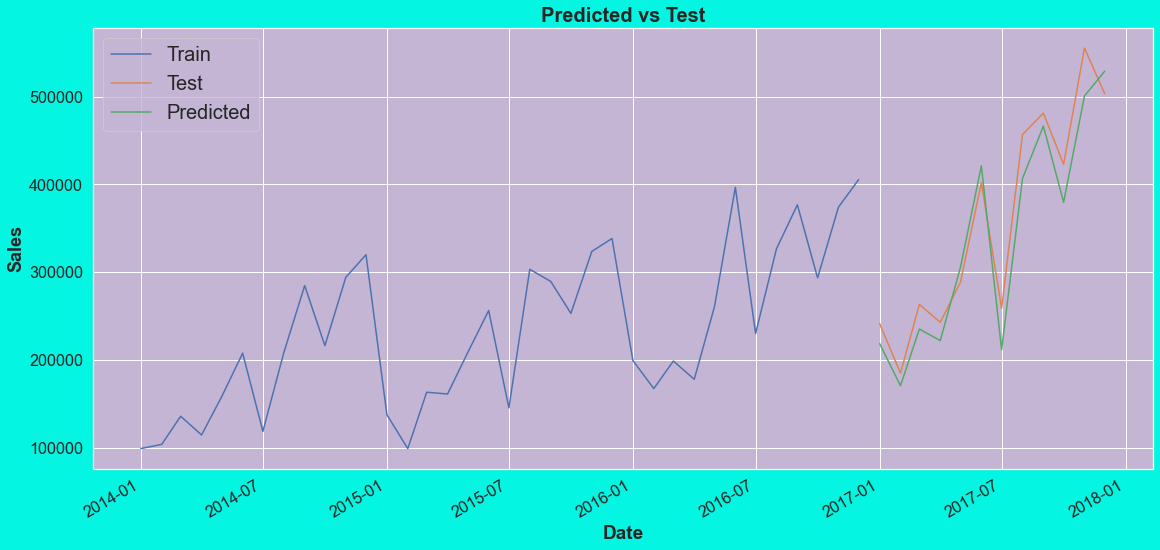

In [138]:
fig,ax = plt.subplots()
d_train['Sales'].plot(legend=True,label='Train',x_compat=True)
d_test['Sales'].plot(legend=True,label='Test',x_compat=True)
test_pred.plot(legend=True,label='Predicted')
sns.set(rc={'axes.facecolor':'#c5b5d4','figure.facecolor':'#04f5e1'})
plt.gcf().set_size_inches(19,9)
plt.legend(prop={"size":20})
plt.xlabel('Date',fontsize=19,fontweight='bold')
plt.ylabel('Sales',fontsize=18,fontweight='bold')
plt.title('Predicted vs Test',fontsize=20,fontweight='bold')
plt.tick_params(axis='both', labelsize=16.2)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))

In [139]:
from sklearn.metrics import mean_squared_error
print(f"RMSE = {np.sqrt(mean_squared_error(d_test,test_pred))}")
print(f"MEAN = {d3.Sales.mean()}")
print(f"SD = {np.sqrt(d3.Sales.var())}")

RMSE = 33023.91118157419
MEAN = 263385.45645583334
SD = 113156.11378087472


In [140]:
final_model = ExponentialSmoothing(d3.Sales,trend='mul',seasonal='mul',seasonal_periods=12).fit()
predicted = final_model.forecast(12)
predicted

C:\Users\win\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2018-01-01    289303.574217
2018-02-01    224088.066292
2018-03-01    311168.635305
2018-04-01    290258.683488
2018-05-01    378525.541267
2018-06-01    521203.162459
2018-07-01    297089.191399
2018-08-01    515031.069359
2018-09-01    593284.195597
2018-10-01    476339.367115
2018-11-01    623030.626811
2018-12-01    666595.816686
Freq: MS, dtype: float64

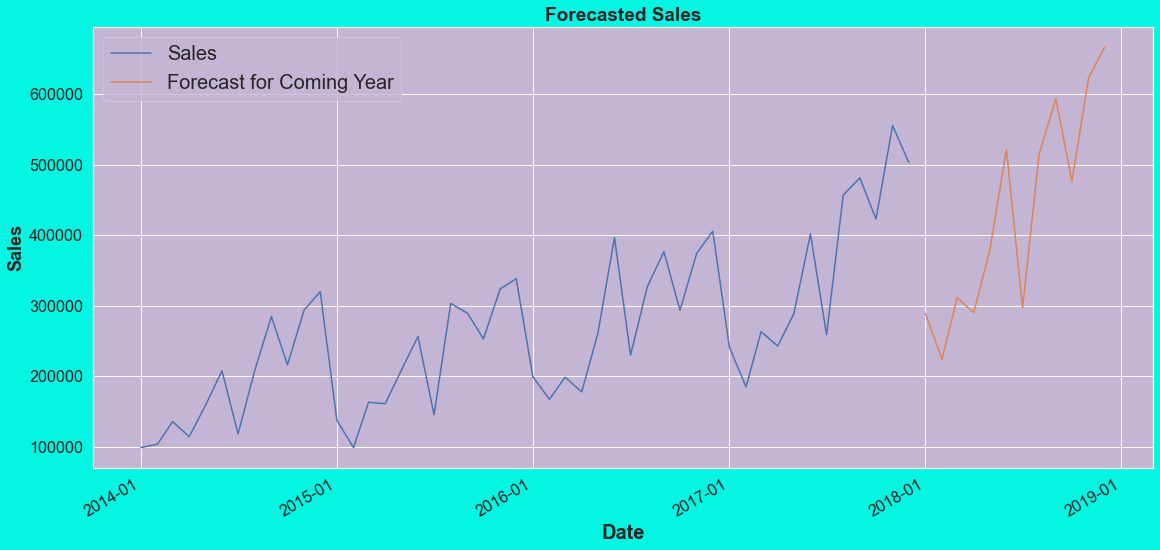

In [141]:
fig,ax = plt.subplots()
d3['Sales'].plot(legend=True,label='Sales',x_compat=True)
predicted.plot(legend=True,label='Forecast for Coming Year',x_compat=True)
sns.set(rc={'axes.facecolor':'#c5b5d4','figure.facecolor':'#04f5e1'})  
plt.gcf().set_size_inches(19,9)
plt.legend(prop={"size":20})
plt.xlabel('Date',fontsize=20,fontweight='bold')
plt.ylabel('Sales',fontsize=18,fontweight='bold')
plt.title('Forecasted Sales',fontsize=19,fontweight='bold')
plt.tick_params(axis='both', labelsize=16.2)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))